In [79]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(filename):
    """Загрузка данных из CSV файла"""
    return pd.read_csv(filename)


def calculate_stats(data_series):
    """Вычисление описательной статистики"""
    stats_dict = {
        'Среднее': np.mean(data_series),
        'Медиана': np.median(data_series),
        'Дисперсия': np.var(data_series, ddof=1),
        'Стандартное отклонение': np.std(data_series, ddof=1),
        'Мода': stats.mode(data_series, keepdims=True).mode[0],
        'Минимум': np.min(data_series),
        'Максимум': np.max(data_series),
        'Скошенность': stats.skew(data_series),
        'Эксцесс': stats.kurtosis(data_series),
        'Q1 (25%)': np.percentile(data_series, 25),
        'Q2 (50%)': np.percentile(data_series, 50),
        'Q3 (75%)': np.percentile(data_series, 75)
    }
    return stats_dict


def plot_distributions(data_series, title):
    """Визуализация распределения данных"""
    plt.figure(figsize=(18, 5))
    
    plt.subplot(1, 3, 1)
    sns.histplot(data_series, bins=15, kde=False)
    plt.title(f'Гистограмма ({title})')
    
    plt.subplot(1, 3, 2)
    sns.kdeplot(data_series, fill=True)
    plt.title(f'Диаграмма плотности ({title})')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data_series)
    plt.title(f'Диаграмма размаха ({title})')
    
    plt.tight_layout()
    plt.show()


def clean_data(data, min_height=140, max_height=220):
    """Очистка данных от выбросов и заполнение пропусков"""
    cleaned = data.copy()
    cleaned = cleaned[(cleaned['height(sm)'] >= min_height) & 
                     (cleaned['height(sm)'] <= max_height)]
    median_height = cleaned['height(sm)'].median()
    cleaned['height(sm)'] = cleaned['height(sm)'].fillna(median_height)
    return cleaned


def count_by_height(data_series, min_h, max_h=None):
    """Подсчет правителей по диапазону роста"""
    if max_h:
        return np.sum((data_series > min_h) & (data_series < max_h))
    return np.sum(data_series > min_h)


def custom_histogram(data, bins=10):
    """Реализация собственной функции гистограммы"""
    bin_edges = np.linspace(np.min(data), np.max(data), bins+1)
    counts = np.zeros_like(bin_edges[:-1], dtype=int)
    indices = np.searchsorted(bin_edges, data, side='right') - 1
    indices[indices == bins] = bins - 1
    np.add.at(counts, indices, 1)
    return counts, bin_edges

# 1-2. Загрузка данных и описательная статистика

1. Первые 5 строк данных:
                 name  height(sm)
0         Aleksandr I       185.0
1        Aleksandr II       185.0
2       Aleksandr III       190.0
3   Aleksandr Nevskiy       165.0
4  Aleksei Tishaishiy       180.0
Среднее: 170.08
Медиана: 175.00
Дисперсия: 2090.85
Стандартное отклонение: 45.73
Мода: 165.00
Минимум: 0.00
Максимум: 300.00
Скошенность: -1.22
Эксцесс: 6.08
Q1 (25%): 165.00
Q2 (50%): 175.00
Q3 (75%): 181.00


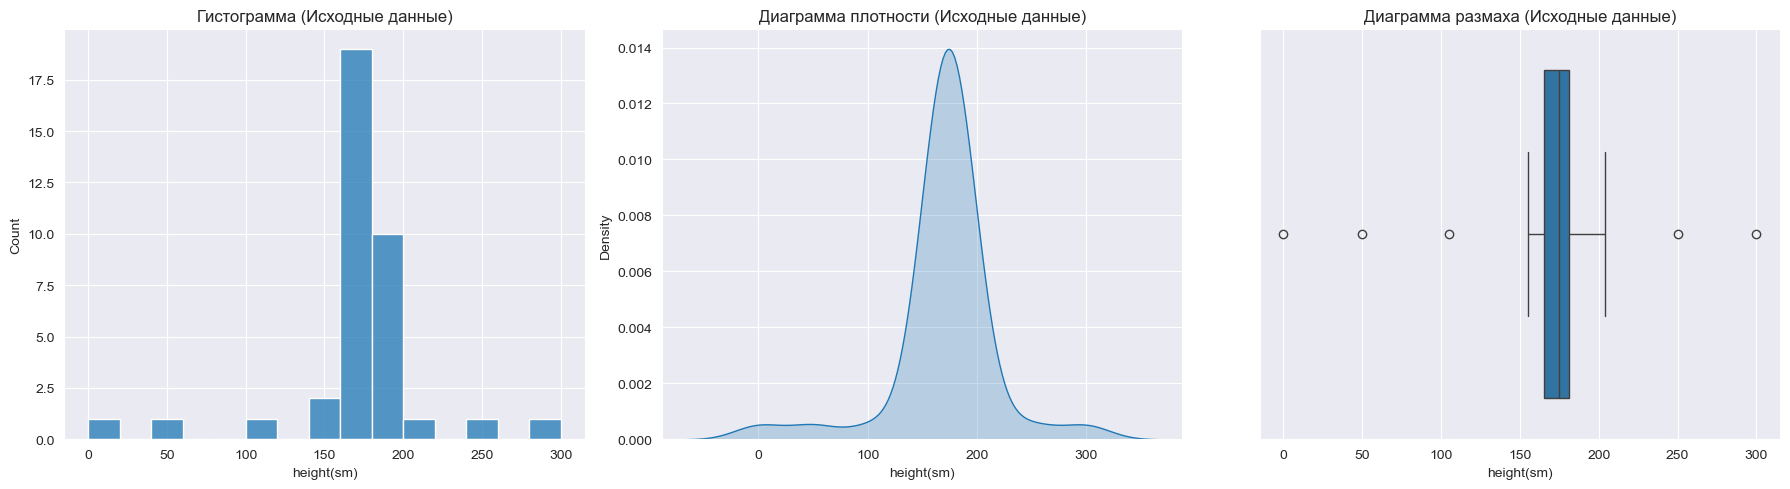

In [80]:
data = load_data('rus_leader_heights.csv')
print("Первые 5 строк данных:")
print(data.head())

orig_stats = calculate_stats(data['height(sm)'].dropna())
for key, value in orig_stats.items():
    print(f"{key}: {value:.2f}")

plot_distributions(data['height(sm)'].dropna(), "Исходные данные")

1. Среднее значение: $x=\frac{1}{n}\sum^n_{i=1} x_i$

2. Медиана Значение, которое делит выборку на две равные части. Если n чётное, то: $M_e=\frac{x_{\frac{n}{2}}+x_{\frac{n}{2}+1}}{2}$
    Если n нечётное, то: $M_e=x_{\frac{n+1}{2}}$
3. Мода - самое частое значение
4. Дисперсия характеризует разброс величин относительно среднего: $D_x={\sum_i^n(x_i - M_x)^2}$
5. Стандартное отклонение показывает насколько значения в среднем отклоняются от среднего значения $\sigma = \sqrt{D}$
6. Скошенность определяет асимметрию распределения $S_k=\frac{\frac{1}{n}\sum^n_{i=1}(x_i-\overline{x})^3}{\sigma^3}$
7. Эксцесс показывает, насколько распределение более "острое" или "плоское" по сравнению с нормальным $E_x=\frac{\frac{1}{n}\sum^n_{i=1}(x_i-\overline{x})^4 -3}{\sigma^4}$
8. Квантили значения, которые делят упорядоченные значения на части

# 3-5. Очистка данных, их анализ, вывод описательной статистики

_Вывод: Распределение данных имеет левостороннюю асимметрию, широкий разброс значений и тяжелые хвосты. Среднее значение ниже медианы, а стандартное отклонение довольно велико, что говорит о значительных колебаниях данных._

Среднее: 174.62
Медиана: 175.00
Дисперсия: 121.34
Стандартное отклонение: 11.02
Мода: 165.00
Минимум: 155.00
Максимум: 204.00
Скошенность: 0.43
Эксцесс: -0.07
Q1 (25%): 165.00
Q2 (50%): 175.00
Q3 (75%): 180.25


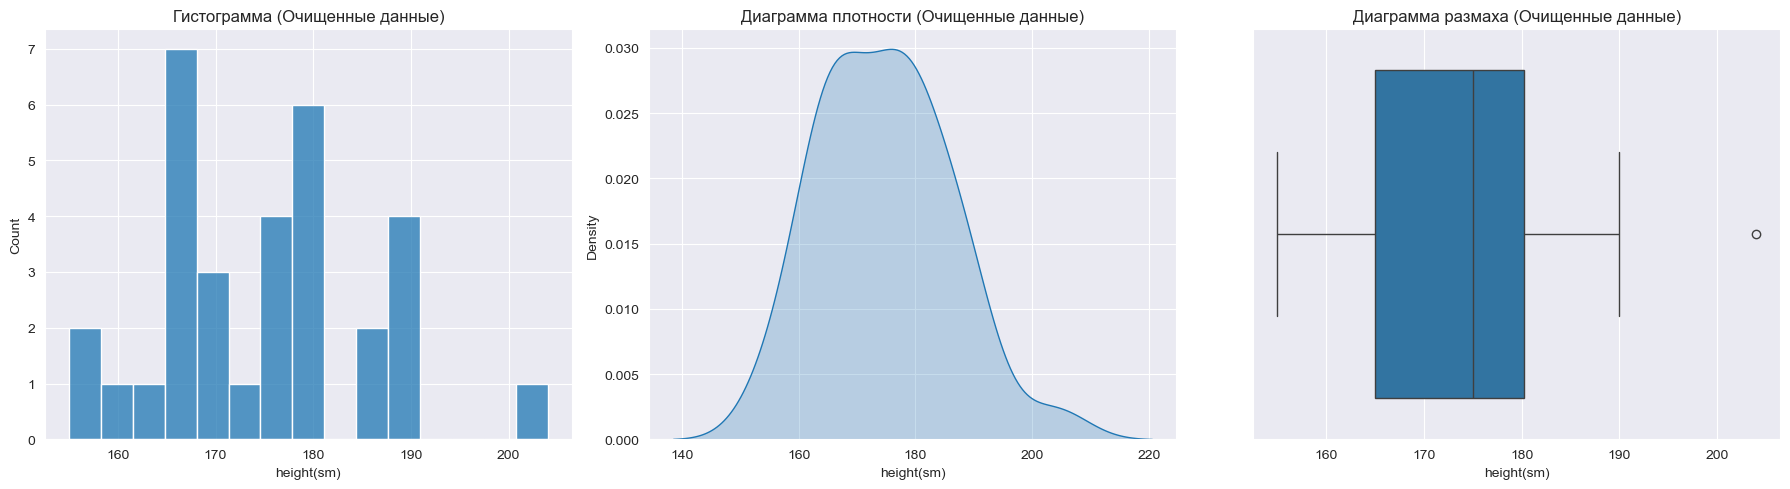

In [81]:
cleaned_data = clean_data(data)


clean_stats = calculate_stats(cleaned_data['height(sm)'])
for key, value in clean_stats.items():
    print(f"{key}: {value:.2f}")


plot_distributions(cleaned_data['height(sm)'], "Очищенные данные")

# 5. Подсчёт по росту

In [82]:
heights = cleaned_data['height(sm)'].values
count_170 = count_by_height(heights, 170)
count_170_190 = count_by_height(heights, 170, 190)
print(f"Правителей с ростом >170 см: {count_170}")
print(f"Правителей с ростом 170-190 см: {count_170_190}")

Правителей с ростом >170 см: 18
Правителей с ростом 170-190 см: 16


# 6. Сравнение кастомной и встроенной гистрограмм

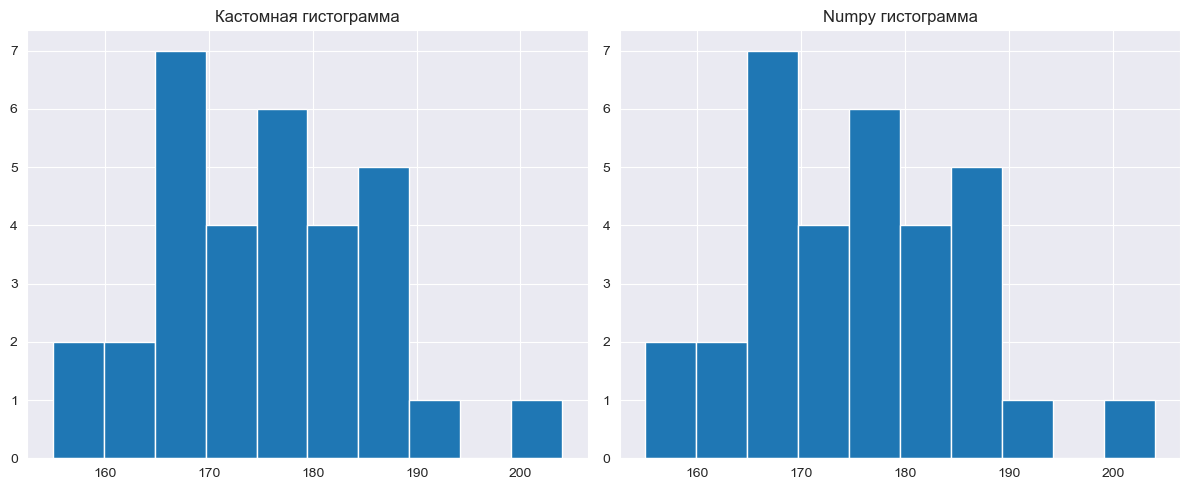

In [83]:
custom_counts, custom_edges = custom_histogram(heights)
numpy_counts, numpy_edges = np.histogram(heights)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(custom_edges[:-1], custom_counts, width=np.diff(custom_edges), align='edge')
plt.title('Кастомная гистограмма')

plt.subplot(1, 2, 2)
plt.bar(numpy_edges[:-1], numpy_counts, width=np.diff(numpy_edges), align='edge')
plt.title('Numpy гистограмма')

plt.tight_layout()
plt.show()